In [1]:
# Necessary Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
# importing train and test data

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [4]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [5]:
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-26
1,2,NaN,Afghanistan,2020-03-27
2,3,NaN,Afghanistan,2020-03-28
3,4,NaN,Afghanistan,2020-03-29
4,5,NaN,Afghanistan,2020-03-30


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22338 entries, 0 to 22337
Data columns (total 6 columns):
Id                22338 non-null int64
Province_State    9490 non-null object
Country_Region    22338 non-null object
Date              22338 non-null object
ConfirmedCases    22338 non-null float64
Fatalities        22338 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.0+ MB


In [7]:
train['Date']=pd.to_datetime(train['Date'])
test['Date']=pd.to_datetime(test['Date'])

In [8]:
train.isnull().sum()

Id                    0
Province_State    12848
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [9]:
# Dropping province column
train.drop(columns='Province_State',axis=1,inplace=True)
test.drop(columns='Province_State',axis=1,inplace=True)

In [10]:
train.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


In [11]:
test.head()

,ForecastId,Country_Region,Date
0,1,Afghanistan,2020-03-26
1,2,Afghanistan,2020-03-27
2,3,Afghanistan,2020-03-28
3,4,Afghanistan,2020-03-29
4,5,Afghanistan,2020-03-30


In [123]:
# percentage of null  values
print((train.isnull().sum()/len(train.index))*100)
# print((test.isnull().sum()/len(test.index))*100)

Id                0.0
Country_Region    0.0
Date              0.0
ConfirmedCases    0.0
Fatalities        0.0
Date_day          0.0
Date_month        0.0
Date_year         0.0
dtype: float64


## Time Series Prediction

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22338 entries, 0 to 22337
Data columns (total 5 columns):
Id                22338 non-null int64
Country_Region    22338 non-null object
Date              22338 non-null datetime64[ns]
ConfirmedCases    22338 non-null float64
Fatalities        22338 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 872.7+ KB


In [14]:
train.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,2020-01-22,0.0,0.0
1,2,Afghanistan,2020-01-23,0.0,0.0
2,3,Afghanistan,2020-01-24,0.0,0.0
3,4,Afghanistan,2020-01-25,0.0,0.0
4,5,Afghanistan,2020-01-26,0.0,0.0


In [124]:
time_df=train.groupby('Date')['ConfirmedCases','Fatalities'].max()

In [16]:
type(time_df)

pandas.core.frame.DataFrame

In [125]:
time_df.tail()

,ConfirmedCases,Fatalities
Date,,
2020-03-30,101739.0,11591.0
2020-03-31,105792.0,12428.0
2020-04-01,110574.0,13155.0
2020-04-02,115242.0,13915.0
2020-04-03,119827.0,14681.0


C:\Users\Mohit Ranjan\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Mohit Ranjan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


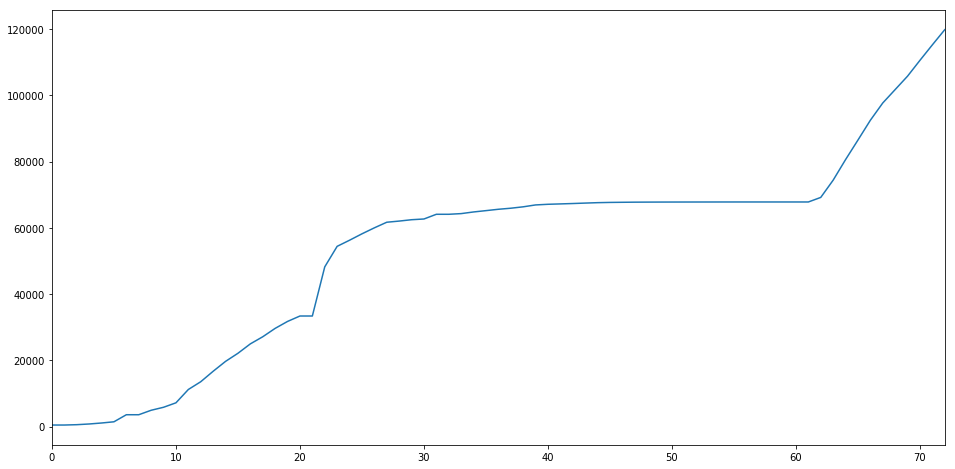

In [126]:
plt.figure(figsize=(16,8))
sns.tsplot(data=time_df['ConfirmedCases'])
plt.show()

In [19]:
def createDateDetails(df,col_name):
    df[col_name+'_day']=df[col_name].dt.day
    df[col_name+'_month']=df[col_name].dt.month
    df[col_name+'_year']=df[col_name].dt.year

In [20]:
createDateDetails(train,'Date')
createDateDetails(test,'Date')

In [21]:
train.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities,Date_day,Date_month,Date_year
0,1,Afghanistan,2020-01-22,0.0,0.0,22,1,2020
1,2,Afghanistan,2020-01-23,0.0,0.0,23,1,2020
2,3,Afghanistan,2020-01-24,0.0,0.0,24,1,2020
3,4,Afghanistan,2020-01-25,0.0,0.0,25,1,2020
4,5,Afghanistan,2020-01-26,0.0,0.0,26,1,2020


C:\Users\Mohit Ranjan\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\Mohit Ranjan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


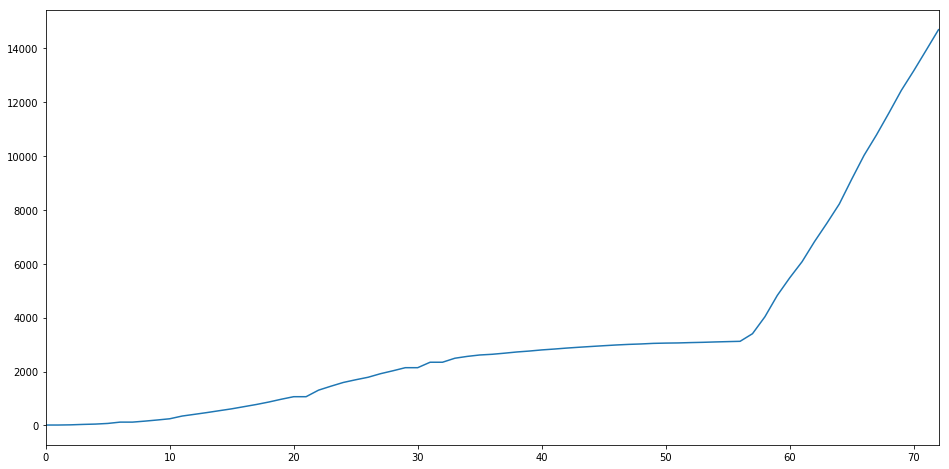

In [127]:
plt.figure(figsize=(16,8))
sns.tsplot(data=time_df['Fatalities'])
plt.show()

In [23]:
month_day_pivot=pd.pivot_table(data=train,values='Fatalities',columns='Date_month',index='Date_day',aggfunc='sum')

In [24]:
month_day_pivot.head()

Date_month,1,2,3,4
Date_day,,,,
1,NaN,259.0,2995.0,46804.0
2,NaN,362.0,3079.0,52978.0
3,NaN,426.0,3153.0,58782.0
4,NaN,492.0,3243.0,NaN
5,NaN,564.0,3336.0,NaN


In [25]:
month_day_pivot.fillna(value=0,inplace=True)

In [26]:
month_day_pivot.head()

Date_month,1,2,3,4
Date_day,,,,
1,0.0,259.0,2995.0,46804.0
2,0.0,362.0,3079.0,52978.0
3,0.0,426.0,3153.0,58782.0
4,0.0,492.0,3243.0,0.0
5,0.0,564.0,3336.0,0.0


Text(0.5,1,'DEATH IN MONTH WORLD WIDE')

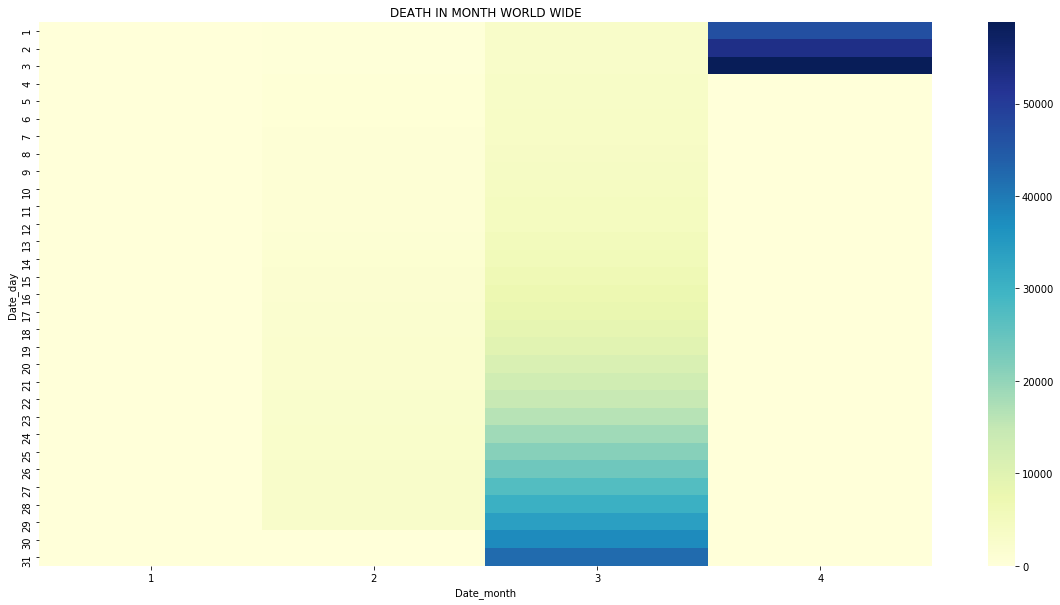

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(data=month_day_pivot,cmap='YlGnBu')
plt.title('DEATH IN MONTH WORLD WIDE')


In [29]:
month_day_cases_pivot=pd.pivot_table(data=train,values='ConfirmedCases',columns='Date_month',index='Date_day',aggfunc='sum')

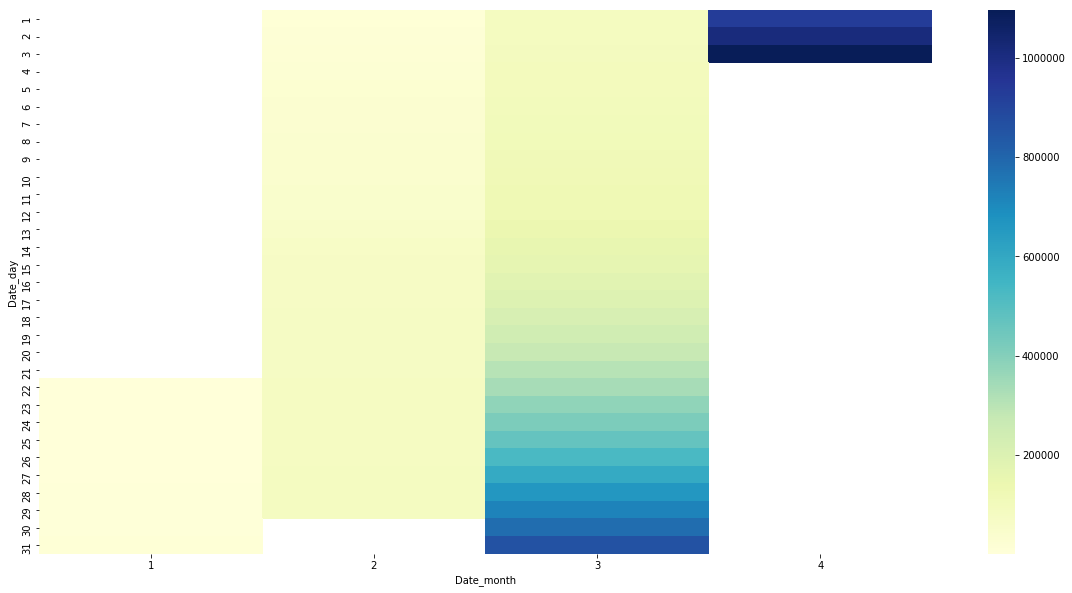

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(data=month_day_cases_pivot,cmap='YlGnBu')

### Observations
We can see the the fatalities and confirmed cases has very high growth rate  with every day of month since Jan 
The darker the region higher is the count of confirmed cases and fatalities

In [31]:
train.head()


,Id,Country_Region,Date,ConfirmedCases,Fatalities,Date_day,Date_month,Date_year
0,1,Afghanistan,2020-01-22,0.0,0.0,22,1,2020
1,2,Afghanistan,2020-01-23,0.0,0.0,23,1,2020
2,3,Afghanistan,2020-01-24,0.0,0.0,24,1,2020
3,4,Afghanistan,2020-01-25,0.0,0.0,25,1,2020
4,5,Afghanistan,2020-01-26,0.0,0.0,26,1,2020


In [32]:
test.head()

,ForecastId,Country_Region,Date,Date_day,Date_month,Date_year
0,1,Afghanistan,2020-03-26,26,3,2020
1,2,Afghanistan,2020-03-27,27,3,2020
2,3,Afghanistan,2020-03-28,28,3,2020
3,4,Afghanistan,2020-03-29,29,3,2020
4,5,Afghanistan,2020-03-30,30,3,2020


## Lets add few more columns or info 

In [79]:
train[train['Country_Region']=='Italy'].groupby(['Date']).sum()

,Id,Fatalities,Date_day,Date_month,Date_year
ConfirmedCases,,,,,
0.0,139680,0.0,234,9,18180
2.0,108696,0.0,52,13,14140
3.0,217539,0.0,189,28,28280
20.0,15546,1.0,21,2,2020
62.0,15547,2.0,22,2,2020
155.0,15548,3.0,23,2,2020
229.0,15549,7.0,24,2,2020
322.0,15550,10.0,25,2,2020
453.0,15551,12.0,26,2,2020


In [35]:
confirmed_total_date_India = train[train['Country_Region']=='India'].groupby(['Date']).agg({'Country_Region':['sum']})

In [53]:
df_t=train.groupby(['Date','Country_Region'])['ConfirmedCases'].sum()

In [56]:
df_t=pd.DataFrame(df_t)

In [58]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13140 entries, (2020-01-22 00:00:00, Afghanistan) to (2020-04-03 00:00:00, Zimbabwe)
Data columns (total 1 columns):
ConfirmedCases    13140 non-null float64
dtypes: float64(1)
memory usage: 145.7+ KB


In [43]:
confirmed_total_date_India.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 73 entries, 2020-01-22 to 2020-04-03
Data columns (total 1 columns):
(ConfirmedCases, sum)    73 non-null float64
dtypes: float64(1)
memory usage: 1.1 KB


In [70]:
train_ts=train.groupby('Country_Region')


In [65]:
train_ts=pd.DataFrame(train_ts)

In [72]:
train_ts.head()

,Id,Country_Region,Date,ConfirmedCases,Fatalities,Date_day,Date_month,Date_year
0,1,Afghanistan,2020-01-22,0.0,0.0,22,1,2020
1,2,Afghanistan,2020-01-23,0.0,0.0,23,1,2020
2,3,Afghanistan,2020-01-24,0.0,0.0,24,1,2020
3,4,Afghanistan,2020-01-25,0.0,0.0,25,1,2020
4,5,Afghanistan,2020-01-26,0.0,0.0,26,1,2020
...,...,...,...,...,...,...,...,...
22265,32636,Zimbabwe,2020-01-22,0.0,0.0,22,1,2020
22266,32637,Zimbabwe,2020-01-23,0.0,0.0,23,1,2020
22267,32638,Zimbabwe,2020-01-24,0.0,0.0,24,1,2020
22268,32639,Zimbabwe,2020-01-25,0.0,0.0,25,1,2020


In [89]:
len(list(train.Country_Region.unique()))

180

In [92]:
count_dict={}

In [93]:
def total_case(df):
    for val in list(train.Country_Region.unique()):
        count_dict[val]=df[df['Country_Region']==val]['ConfirmedCases'].max()


In [94]:
total_case(train)

In [106]:
count_df=pd.DataFrame(count_dict.items(),columns=['countries','case'])

In [115]:
count_df=count_df.sort_values(by=['case'],ascending=False)

Text(0.5,1,'TOTAL CASES ACROSS THE WORLD')

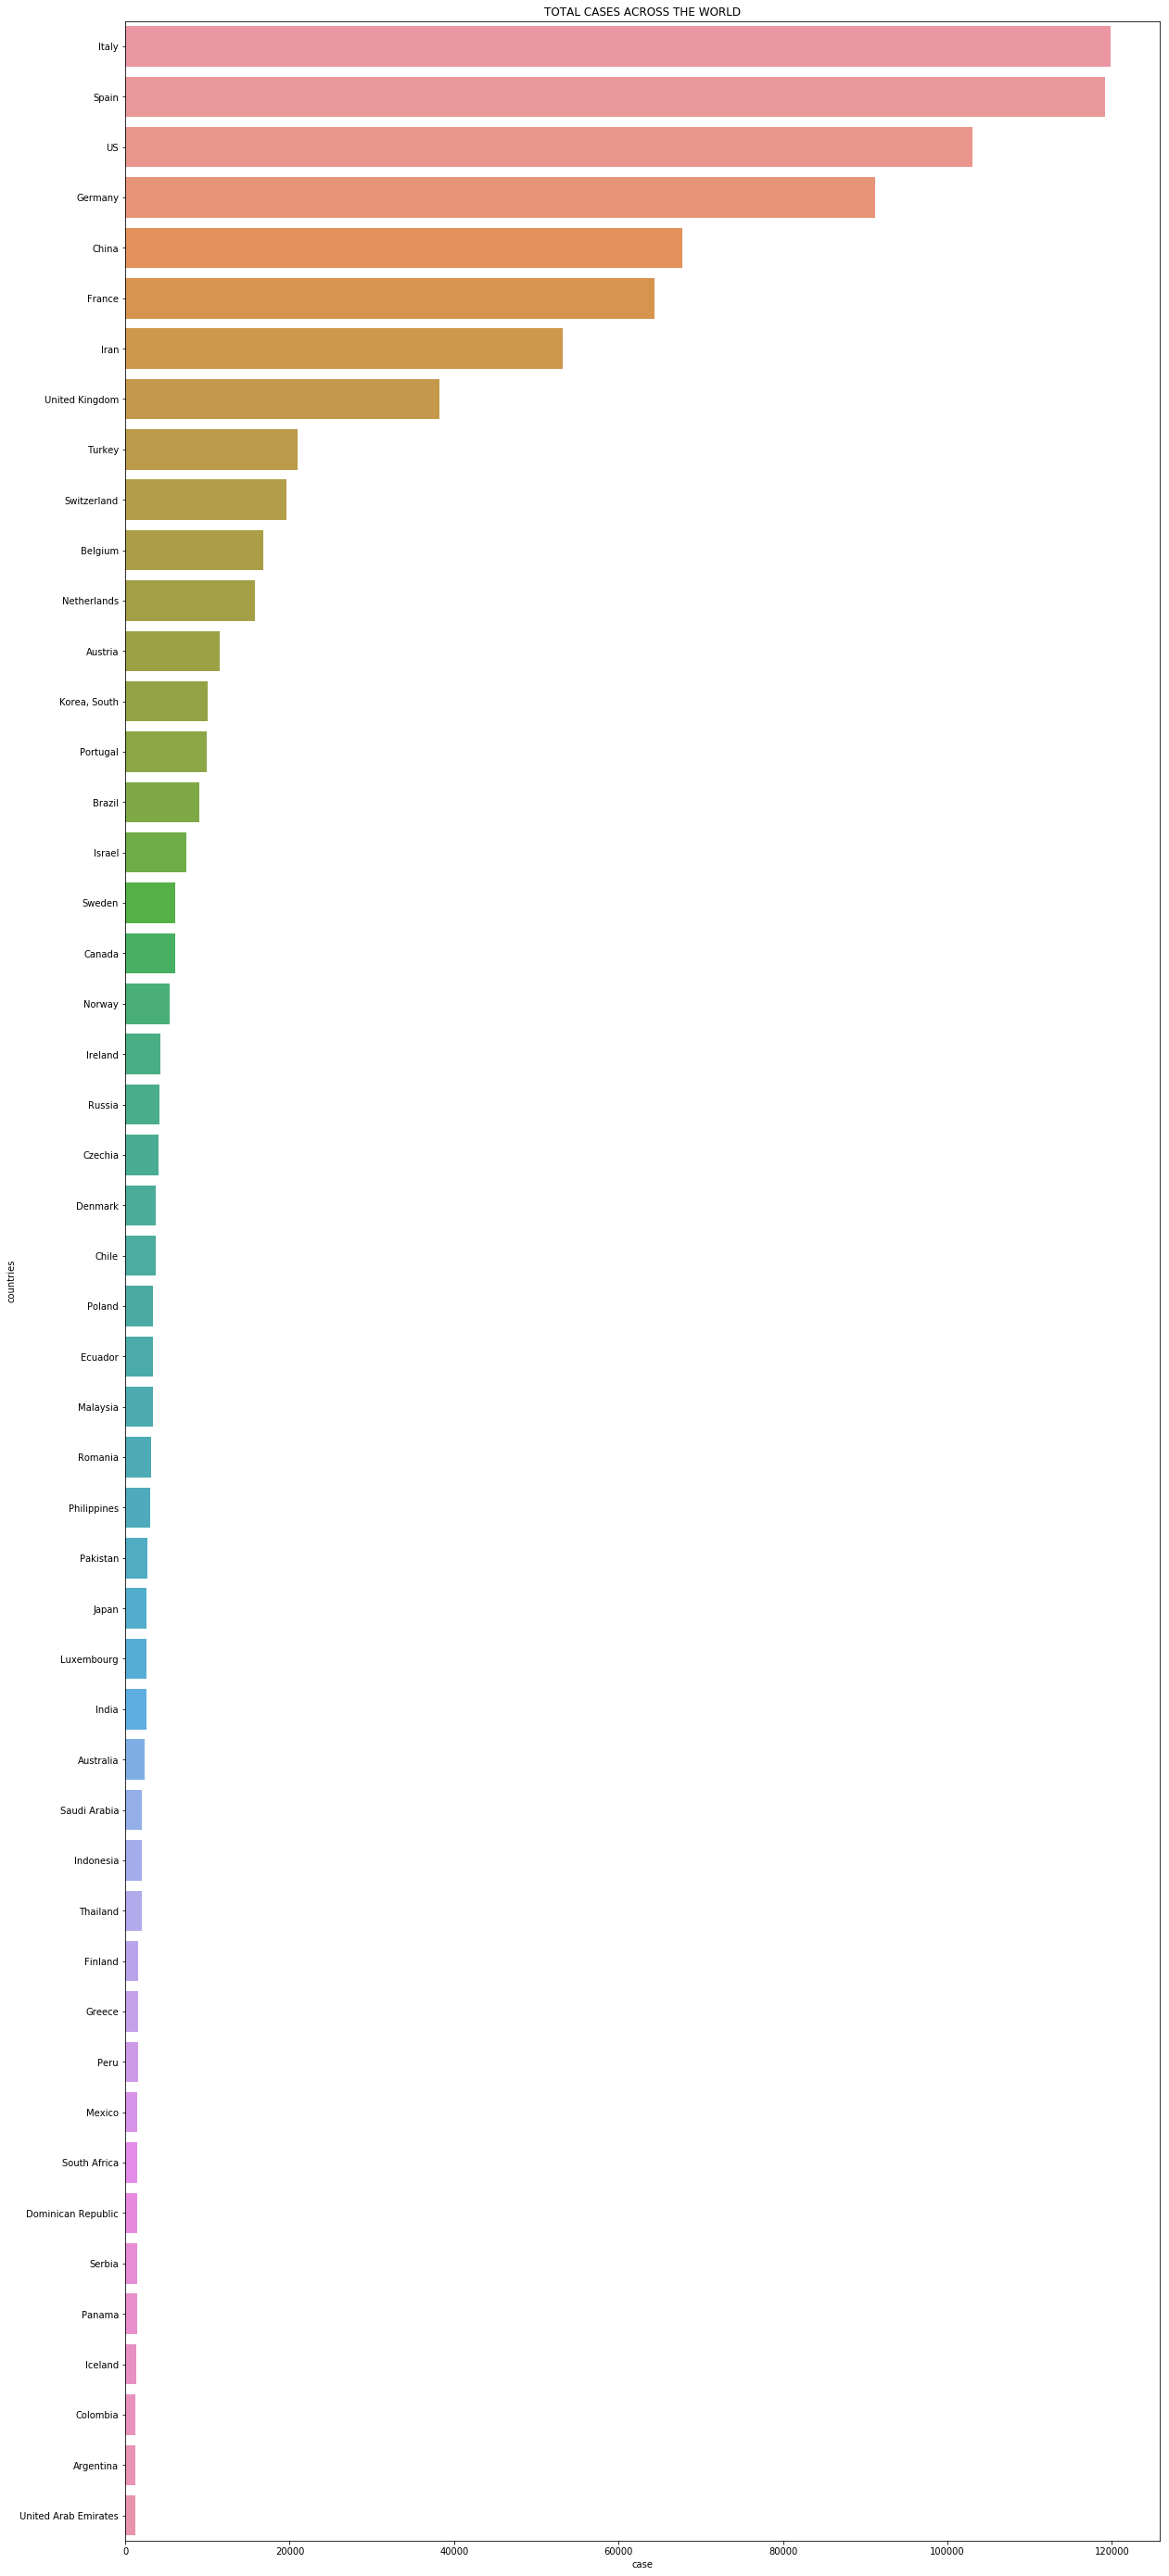

In [122]:
plt.figure(figsize=(20,50))
sns.barplot(data=count_df.iloc[:50,:],x='case',y='countries')#Top 50 countries only included
plt.title('TOTAL CASES ACROSS THE WORLD')

In [85]:
train[train['Country_Region']=='Afghanistan']['ConfirmedCases'].max()

281.0

In [ ]:
train_ts['ConfirmedCases'].plot()

In [ ]:
train_ts['Fatalities'].plot(figsize=(12,5))

In [ ]:
train_ts['Fatalities'].plot(figsize=(12,5))
train_ts.rolling(window=30).mean()['Fatalities'].plot()